In [93]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [94]:
pd.set_option('display.max_columns', 50)
coffeeDataSet = pd.read_csv('data\Coffee_Chain_Sales .csv')

### Oletetaan että raha yksikköä käyttävät pylväät ovat kEuroina 1 = 1000

In [95]:
dataSet = coffeeDataSet.copy()

In [96]:
dataSet

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [97]:
dataSet.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


# Myynnin analisointi

## Myynti osavaltiota kohden

In [98]:
stateSaleSet = dataSet.copy()
stateSaleSet = stateSaleSet.groupby(['State'])['Sales'].sum().reset_index()
stateSaleSet['%'] = stateSaleSet.groupby(['State'])['Sales'].transform('sum') / stateSaleSet['Sales'].sum() * 100
stateSaleSet

,State,Sales,%
0,California,23032,11.351684
1,Colorado,12112,5.969590
2,Connecticut,6670,3.287415
3,Florida,8825,4.349540
4,Illinois,16812,8.286059
5,Iowa,13359,6.584194
6,Louisiana,6193,3.052318
7,Massachusetts,7339,3.617142
8,Missouri,6072,2.992681
9,Nevada,14822,7.305256


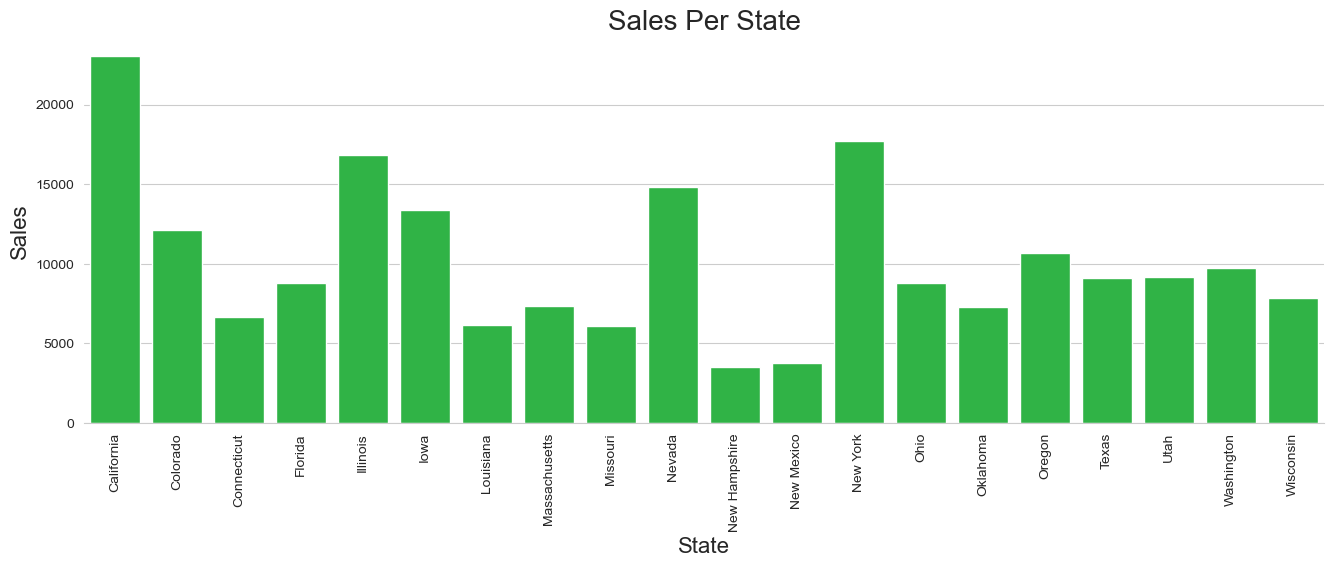

In [99]:
fig1, ax1 = plt.subplots(figsize=(16, 5))
plt.rcParams['figure.dpi'] = 100
plt.title('Sales Per State', size=20)
plt.xlabel('State', size=16)
plt.ylabel('Sales', size=16)
plt.xticks(rotation='vertical')
sns.barplot(x=stateSaleSet['State'], y=stateSaleSet['Sales'], color='g')
sns.despine(left=True)
plt.show()

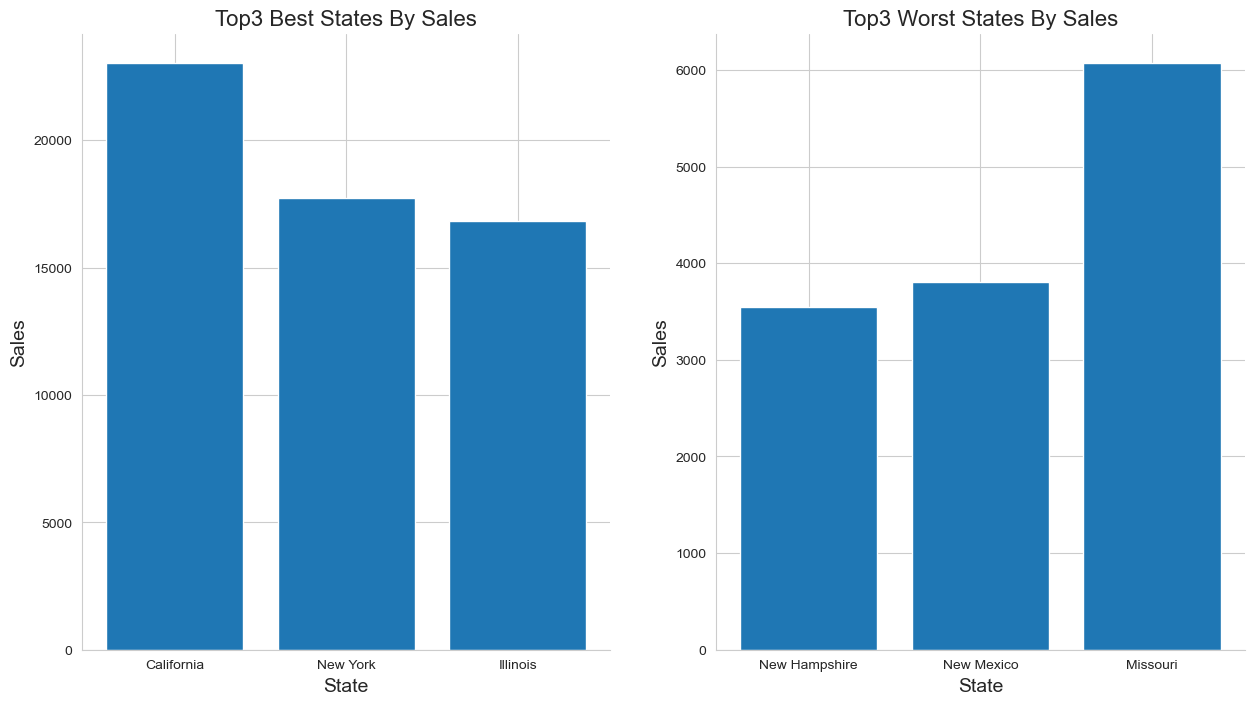

In [100]:
stateSaleSetF = stateSaleSet.sort_values(by='Sales', ascending=False)
stateSaleSetT = stateSaleSet.sort_values(by='Sales')
fig, ax5 = plt.subplots(1, 2, figsize=(15, 8))
sns.despine()
ax5[0].bar(stateSaleSetF['State'][:3], stateSaleSetF['Sales'][:3])
ax5[1].bar(stateSaleSetT['State'][:3], stateSaleSetT['Sales'][:3])
ax5[0].set_title('Top3 Best States By Sales', size=16)
ax5[1].set_title('Top3 Worst States By Sales', size=16)
ax5[0].set_ylabel('Sales', size=14)
ax5[1].set_ylabel('Sales', size=14)
ax5[0].set_xlabel('State', size=14)
ax5[1].set_xlabel('State', size=14)
plt.show()

## Voitto osavaltiota kohden

### Oletetaan että Raha yksiköt ovat kEuroina 1 = 1000 

In [101]:
stateProfit = dataSet.copy()
stateProfit = (stateProfit.groupby(['State'])['Profit'].sum() * 1000).reset_index()

In [102]:
stateProfit['%'] = stateProfit.groupby(['State'])['Profit'].transform('sum') / stateProfit['Profit'].sum() * 100
stateProfit

,State,Profit,%
0,California,7340000,11.413289
1,Colorado,4450000,6.919501
2,Connecticut,2066000,3.212514
3,Florida,2794000,4.344513
4,Illinois,7380000,11.475486
5,Iowa,5412000,8.415357
6,Louisiana,2026000,3.150316
7,Massachusetts,3710000,5.768842
8,Missouri,956000,1.486526
9,Nevada,2556000,3.974437


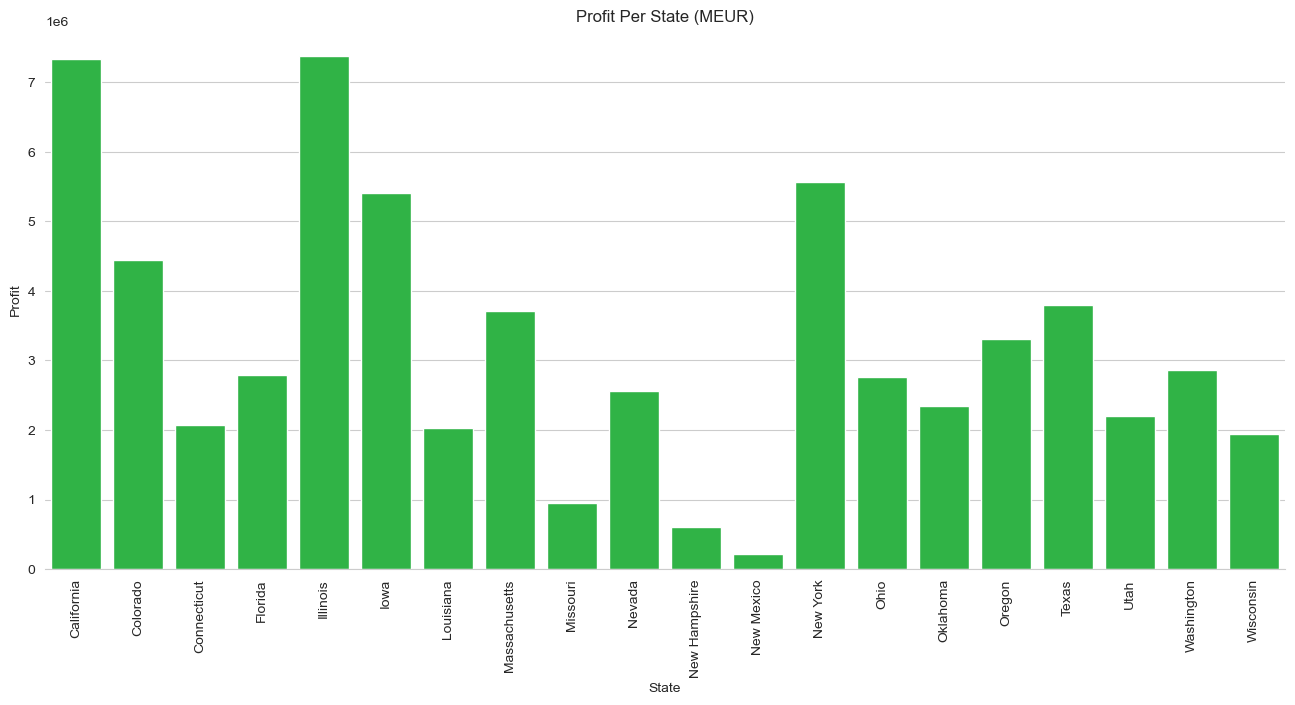

In [103]:
plt.subplots(figsize=(16, 7))
sns.set_color_codes('bright')
sns.barplot(x='State', y='Profit', data=stateProfit, label='Profit Per State (MEUR)', color='g')
plt.xticks(rotation='vertical')
plt.title('Profit Per State (MEUR)')
sns.despine(left=True)

## Voitto kuukausittain ja quartaalittain

In [104]:
mounthlyProfit = dataSet.copy()
mounthlyProfit = (mounthlyProfit.groupby(pd.PeriodIndex(mounthlyProfit['Date'], freq='M'))['Profit'].sum() * 1000).reset_index()
mounthlyProfit['Month'] = mounthlyProfit['Date'].dt.strftime('%B')
mounthlyProfit['Year'] = mounthlyProfit['Date'].dt.year
mounthlyProfit

,Date,Profit,Month,Year
0,2012-10,873000,October,2012
1,2012-11,806000,November,2012
2,2012-12,814000,December,2012
3,2013-01,1314000,January,2013
4,2013-02,886000,February,2013
5,2013-03,686000,March,2013
6,2013-04,1014000,April,2013
7,2013-05,862000,May,2013
8,2013-06,314000,June,2013
9,2013-07,600000,July,2013


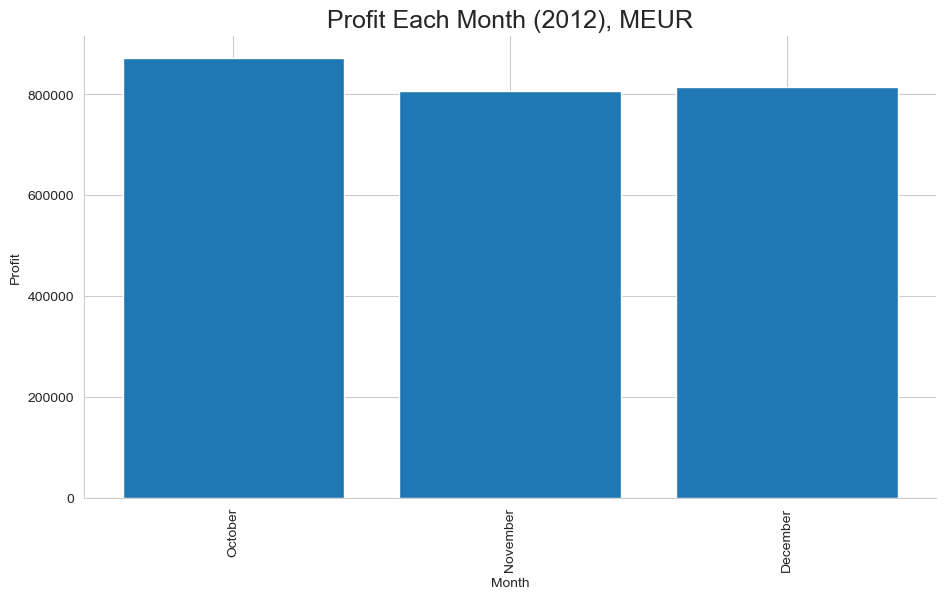

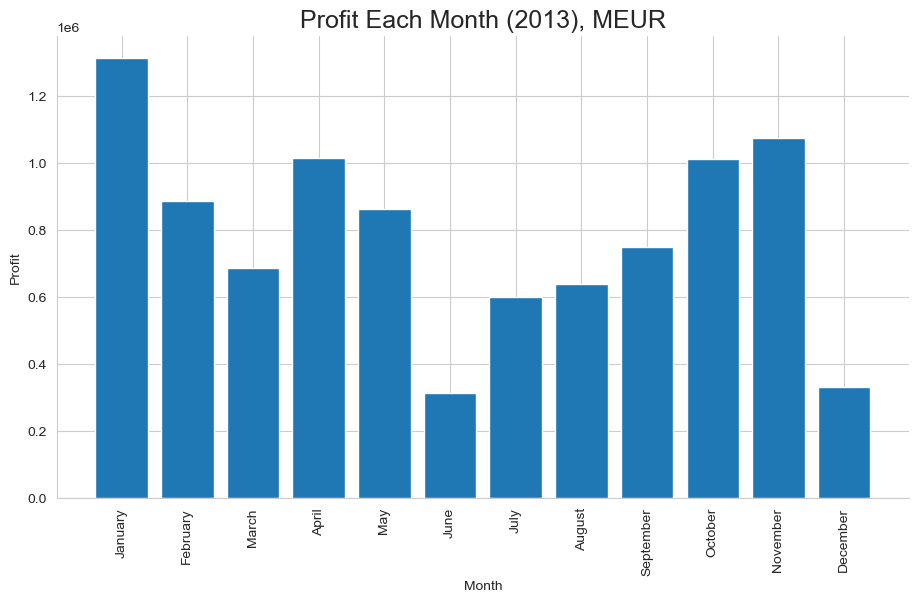

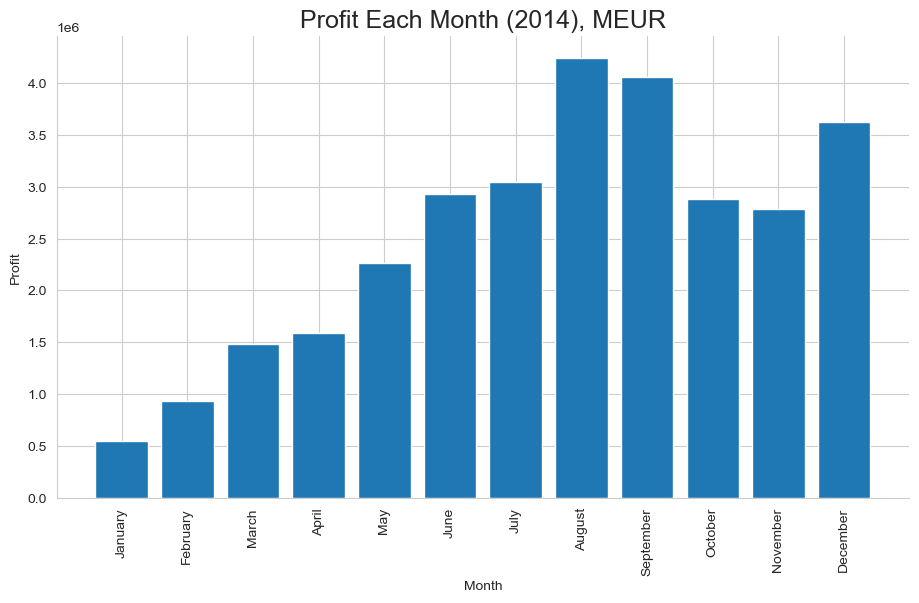

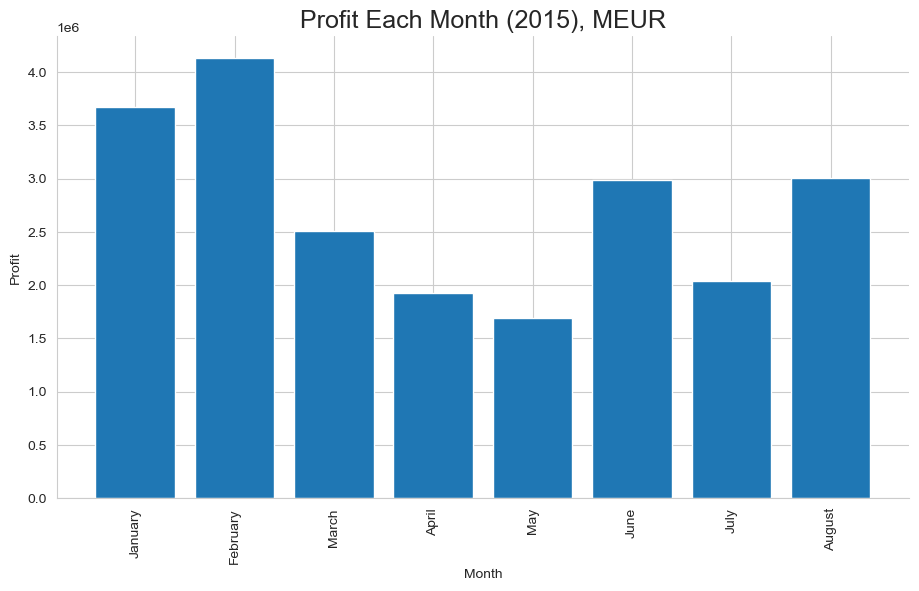

In [105]:
for year, df in mounthlyProfit.groupby('Year'):
    plt.subplots(figsize=(11, 6))
    plt.bar(df['Month'], df['Profit'])
    plt.xlabel('Month')
    plt.ylabel('Profit')
    plt.title(f'Profit Each Month ({year}), MEUR', size=18)
    sns.despine()
    plt.xticks(rotation='vertical')


In [106]:
quarterProfit = dataSet.copy()
quarterProfit = (quarterProfit.groupby(pd.PeriodIndex(quarterProfit['Date'], freq='Q'))['Profit'].sum() * 1000).reset_index()
quarterProfit

,Date,Profit
0,2012Q4,2493000
1,2013Q1,2886000
2,2013Q2,2190000
3,2013Q3,1989000
4,2013Q4,2419000
5,2014Q1,2970000
6,2014Q2,6785000
7,2014Q3,11342000
8,2014Q4,9283000
9,2015Q1,10315000


In [107]:
quarterProfit['Q'] = quarterProfit['Date'].dt.quarter
quarterProfit['Year'] = quarterProfit['Date'].dt.year
quarterProfit

,Date,Profit,Q,Year
0,2012Q4,2493000,4,2012
1,2013Q1,2886000,1,2013
2,2013Q2,2190000,2,2013
3,2013Q3,1989000,3,2013
4,2013Q4,2419000,4,2013
5,2014Q1,2970000,1,2014
6,2014Q2,6785000,2,2014
7,2014Q3,11342000,3,2014
8,2014Q4,9283000,4,2014
9,2015Q1,10315000,1,2015


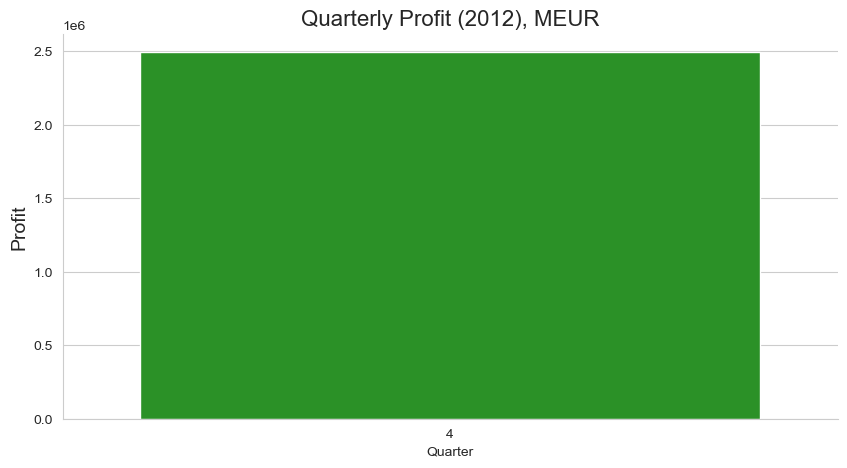

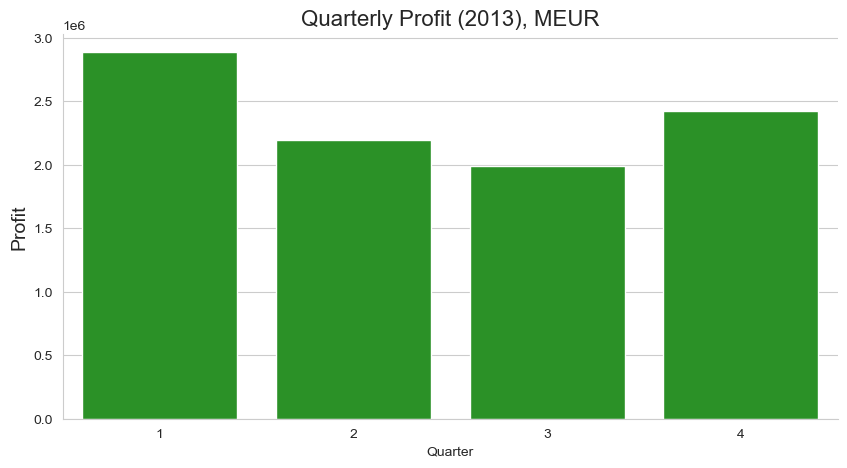

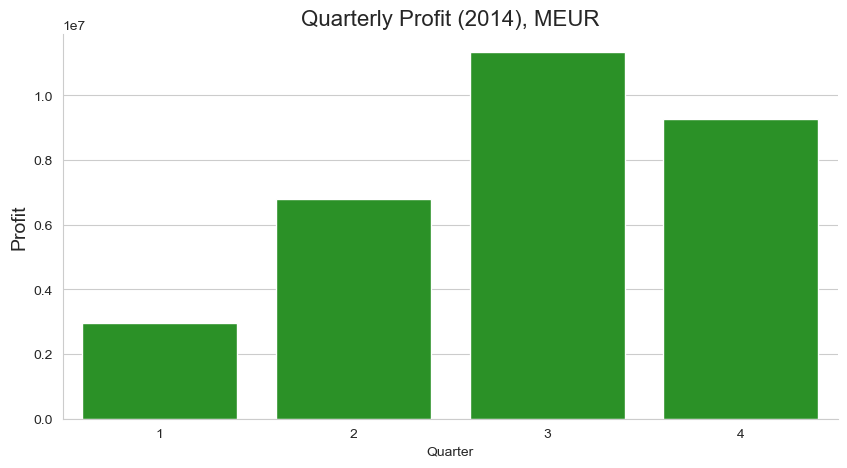

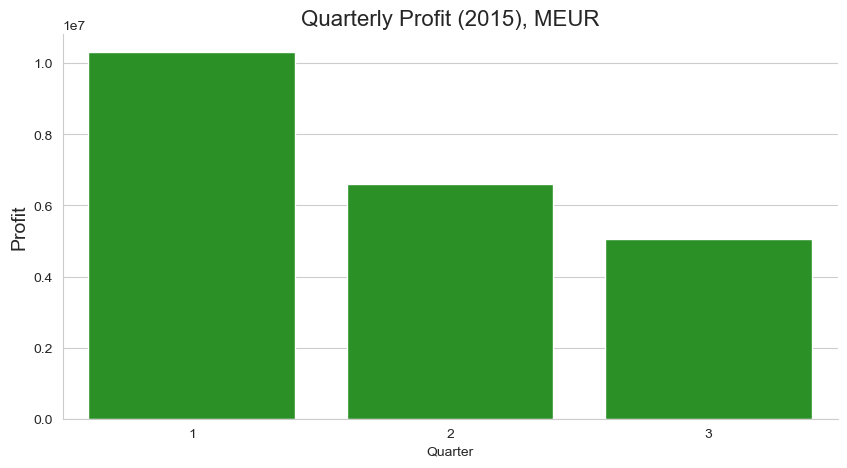

In [108]:
for year, df in quarterProfit.groupby('Year'):
    plt.subplots(figsize=(10, 5))
    sns.barplot(data=df, x='Q', y='Profit', palette=['#1ba315'])
    sns.set_style('whitegrid')
    plt.ylabel('Profit', size=14)
    plt.xlabel('Quarter')
    plt.title(f'Quarterly Profit ({year}), MEUR', size=16)
    sns.despine()
    plt.show()

## Onko kahvila ylittänyt vai alittanut tavoitevoittoa

In [109]:
targetProfit = dataSet.copy()
targetProfit = targetProfit.groupby(['Area Code']).agg({'Profit': 'sum', 'Target_profit': 'sum','DifferenceBetweenActualandTargetProfit': 'sum' }) * 1000
targetProfit

,Profit,Target_profit,DifferenceBetweenActualandTargetProfit
Area Code,,,
203,944000,930000,14000
206,779000,870000,-91000
209,599000,460000,139000
210,181000,140000,41000
212,422000,240000,182000
...,...,...,...
970,1740000,1790000,-50000
971,1370000,1430000,-60000
972,321000,350000,-29000


In [110]:
exceed = (targetProfit['Profit'] > targetProfit['Target_profit']).sum()
misses = (targetProfit['Profit'] < targetProfit['Target_profit']).sum()
equal = (targetProfit['Profit'] == targetProfit['Target_profit']).sum()
data = {'Exceed': [exceed], 'Misses': [misses], 'Matches': [equal]}
exceedOrMisses = pd.DataFrame(data)

In [111]:
exceedOrMisses

,Exceed,Misses,Matches
0,74,74,1


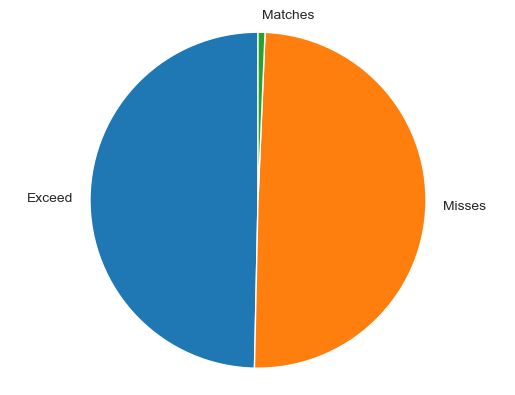

In [112]:
x = np.array(exceedOrMisses).flatten()
plt.pie(x, labels=['Exceed', 'Misses', 'Matches'], startangle=90)
plt.axis('equal')
plt.show()

# Tuoteiden analysointi

## Kofeinittomien ja kofeinillisten myynti

In [113]:
regularOrDecaf = dataSet.copy()
regularOrDecaf = regularOrDecaf.groupby(['Type'])['Sales'].sum().reset_index()
regularOrDecaf['%'] = regularOrDecaf.groupby(['Type'])['Sales'].transform('sum') / regularOrDecaf['Sales'].sum() * 100
regularOrDecaf

,Type,Sales,%
0,Decaf,85404,42.092708
1,Regular,117491,57.907292


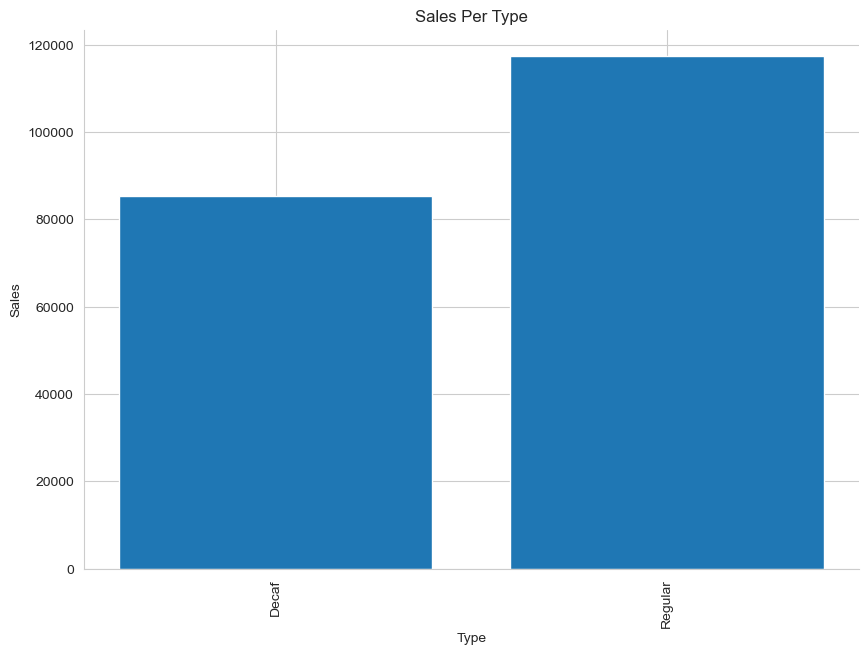

In [124]:
plt.subplots(figsize=(10, 7))
plt.bar(regularOrDecaf['Type'], regularOrDecaf['Sales'])
sns.despine()
plt.xlabel('Type')
plt.ylabel('Sales')
plt.title('Sales Per Type')
plt.xticks(rotation='vertical')
plt.show()

In [115]:
mostPopularItem = dataSet.copy()
mostPopularItem = mostPopularItem.groupby(['Product'])['Sales'].sum().reset_index()
mostPopularItem

,Product,Sales
0,Amaretto,6781
1,Caffe Latte,8665
2,Caffe Mocha,21716
3,Chamomile,19295
4,Colombian,30761
5,Darjeeling,17758
6,Decaf Espresso,18888
7,Decaf Irish Cream,14831
8,Earl Grey,16546
9,Green Tea,8520


## Myynti tuotetta kohden

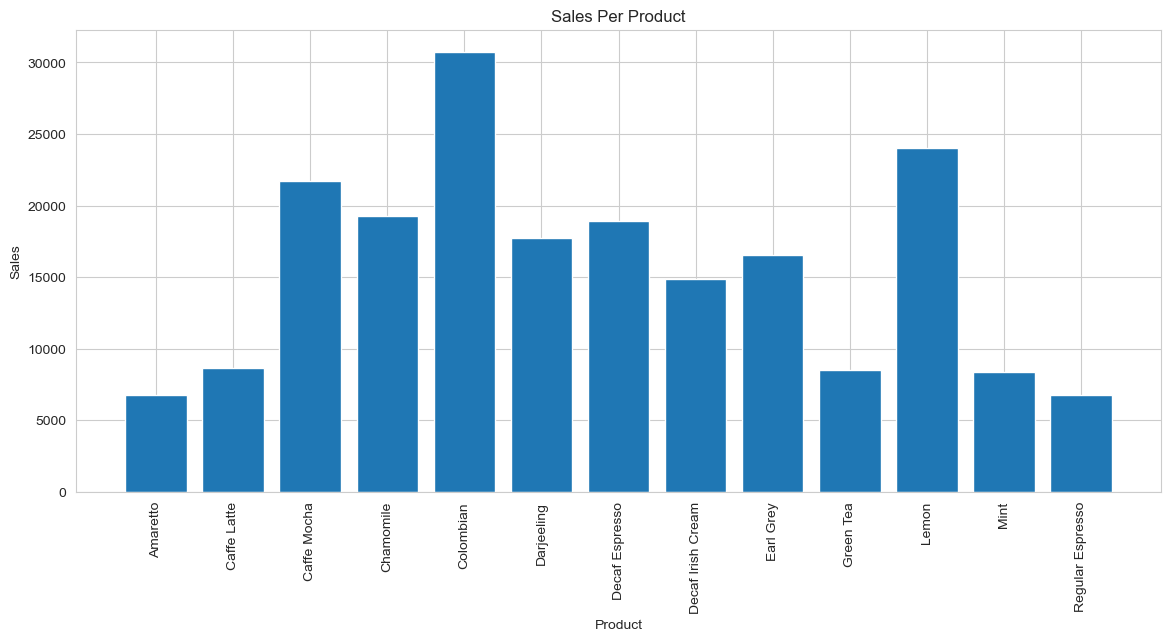

In [116]:
plt.subplots(figsize=(14, 6))
plt.bar(mostPopularItem['Product'], mostPopularItem['Sales'])
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales Per Product')
plt.xticks(rotation='vertical')
plt.show()

## Voiton myytyä tuotetta kohden

In [117]:
def bestProduct():
    uniqProducts = dataSet['Product'].unique()
    productData = {}

    for product in uniqProducts:
        prod = dataSet[dataSet['Product'] == product]
        sales = pd.DataFrame(prod['Sales']).to_numpy()
        profit = pd.DataFrame(prod['Profit']).to_numpy()
        profitPersale = np.divide(np.sum(profit, axis=0), np.sum(sales, axis=0))
        productData[product] = profitPersale
    
    return productData

In [125]:
best = bestProduct()
key = np.array(list(best.keys()))
value = np.array(list(best.values())).ravel()

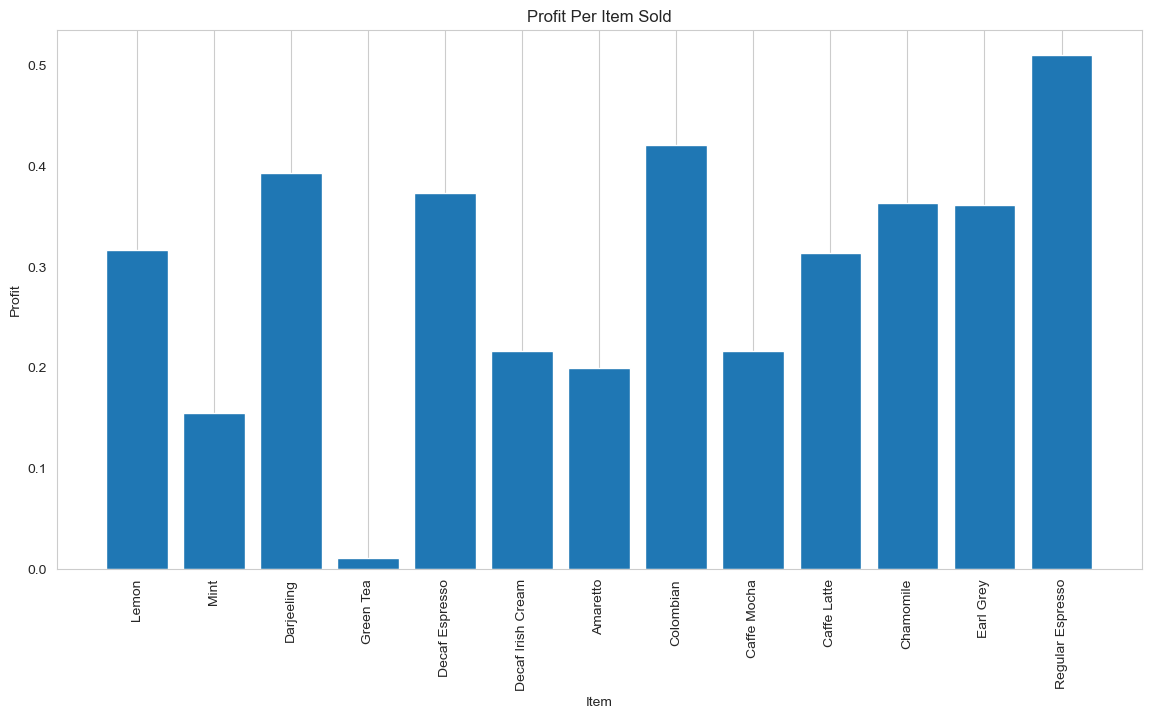

In [126]:
plt.subplots(figsize=(14, 7))
plt.bar(key, value)
plt.xlabel('Item')
plt.ylabel('Profit')
plt.title('Profit Per Item Sold')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

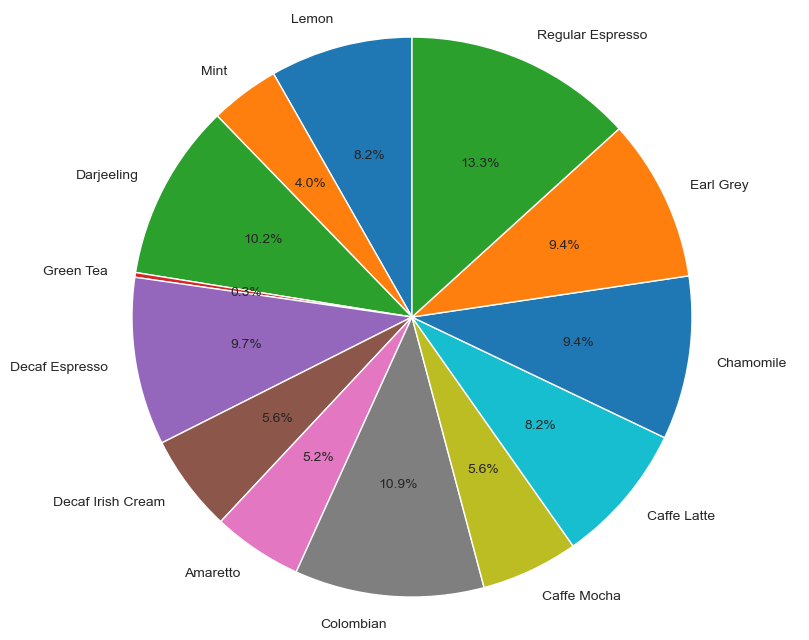

In [120]:
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(value, labels=key,  autopct='%.1f%%', startangle=90)
ax.axis('equal')
plt.show()